### <div style="padding: 35px;color:Black;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.definition.org/wp-content/uploads/2018/04/Titanic_11.jpg)"><b><span style='color:#404040'>Titanic model 🚢🌊 Getting Started.. </span></b> </div>

<br>

In this kernel I will create a machine learning model on the famous Titanic dataset, which is used by many people all over the world. The objective of this project is to build a model to predict whether passengers on the Titanic would survive or not based on pattern extracted from analysing features.

<br>

<p style="text-align:center; ">
<img src="https://cf.ltkcdn.net/kids/images/std/236793-1600x1200-titanic.jpg" style='width: 500px; height: 350px;'>
</p>

<br>

### <b><span style='color:#0077b3'>|</span> Domain Knowledge</b>

<br>

* `survival`: Target column has two values (0 = No, 1 = Yes).
* `pclass`:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* `sex`: male or female.
* `Age`: Age of passengers in years.	
* `sibsp`: number of siblings / spouses aboard the Titanic.	
* `parch`: number of parents / children aboard the Titanic.
* `ticket`:	Ticket number.
* `fare`: Passenger fare.
* `cabin`: Cabin number.	
* `embarked`: Port of Embarkation has three values (C = Cherbourg, Q = Queenstown, S = Southampton)   

✔️ **These variables, in combination with appropriate statistical and machine learning techniques, can help predict whether passengers would survive or not.**

<br>

<div style="padding: 20px;color:Black;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.definition.org/wp-content/uploads/2018/04/Titanic_11.jpg)"><b><span style='color:#404040'> Table of contents </span></b> </div>

    
|No  | Contents |
|:---| :---     |
|1   | [<font color="#1c1c1c"> Introduction </font>](#1)                   
|2   | [<font color="#1c1c1c"> Data Review </font>](#2)                         
|3   | [<font color="#1c1c1c"> Explore data analysis </font>](#3)                     
|4   | [<font color="#1c1c1c"> data preprocessing </font>](#4)                       
|5   | [<font color="#1c1c1c"> Modeling </font>](#5)      
|6   | [<font color="#1c1c1c"> Evaluate </font>](#6)              
|7   | [<font color="#1c1c1c"> Submission </font>](#7)              
|8   | [<font color="#1c1c1c"> Conclusion </font>](#8)              
   

# <a id="1"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>0 | Introduction </span></b> </div>

## <b>I <span style='color:#595959'>|</span> Import libraries</b> 

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import re

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

#machine learning libraries:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve 
from sklearn.metrics import r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import os
os.environ['PYTHONWARNINGS']='ignore::FutureWarning'

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore', category=DataConversionWarning)
warnings.warn("once")

/var/folders/ms/g5dss8lj7h9dp49v7kvt1hl00000gq/T/ipykernel_3049/2287212041.py:35: UserWarning: once
  warnings.warn("once")


## <b>II <span style='color:#595959'>|</span> Import data</b> 

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <a id="2"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>1 | Data Review </span></b> </div>

In [4]:
print(f'''The shape of data:

1) training: {train_df.shape}
2) testing: {test_df.shape}
''')

The shape of data:

1) training: (891, 12)
2) testing: (418, 11)



In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
round(train_df['Survived'].mean()*100,2)

38.38

In [9]:
print(train_df.dtypes)
print(f"""
Number of float features: {len(train_df.select_dtypes('float').columns)}
Number of int features: {len(train_df.select_dtypes('int').columns)}
Number of object features: {len(train_df.select_dtypes('object').columns)}
""")

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Number of float features: 2
Number of int features: 5
Number of object features: 5



### **<mark style="color:white;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> Note that </mark>**
you should put in your mind:

**<mark style="background-color:#595959;color:white;border-radius:2px;opacity:1.0">1</mark>** Which numerical features are `discrete` or `continuous`?

**<mark style="background-color:#595959;color:white;border-radius:2px;opacity:1.0">2</mark>** Which categorical features are `nominal`, `ordinal` or `ratio`?

**<mark style="background-color:#595959;color:white;border-radius:2px;opacity:1.0">3</mark>** Which features are mixed data types?


This can help us select the appropriate and suitable plots for visualization.

In [10]:
# columns which have nulls and the percentage of nulls in each column

train_data_na = (train_df.isnull().sum() / len(train_df)) 
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
train_missing_data = pd.DataFrame({'mean of nulls' :train_data_na , "number_of_nulls" : train_df[train_data_na.index].isna().sum()})
train_missing_data

,mean of nulls,number_of_nulls
Cabin,0.771044,687
Age,0.198653,177
Embarked,0.002245,2


In [11]:
test_data_na = (test_df.isnull().sum() / len(test_df)) 
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)
test_missing_data = pd.DataFrame({'mean of nulls' :test_data_na, "number_of_nulls" : test_df[test_data_na.index].isna().sum()})
test_missing_data

,mean of nulls,number_of_nulls
Cabin,0.782297,327
Age,0.205742,86
Fare,0.002392,1


In [12]:
train_df[['Ticket']].duplicated().sum()/len(train_df)*100

23.56902356902357

## <b><span style='color:#595959'>|</span> Observations </b> 

* The training-set has 891 rows and 11 features + `survived` column (target feature).
<br>

* `Categorical` columns: Survived, Sex, and Embarked. `Ordinal` columns: Pclass.

* `Continous` columns: Age, Fare. `Discrete` columns: SibSp, Parch.

* `alphanumeric` columns: Ticket and Cabin.
<br>

* Around `38.38%` of the training-set survived the Titanic.

* The passenger ages range from 0.4 to 80.

* `Sex` column has two values with `65%` male (freq=577/count=891).

* `Embarked` column has three values. port S used by `72.4%` of passengers.

* `Ticket` column contains high ratio of duplicates (`23.5%`). we might want to drop it.
<br>

* There are three columns in our data have missing values: 
    * `Cabin` column have almost `77%` null values of its data. we might want to drop it.
    * 177 value in `Age` column are missed, Around `19%` of its data.
    * Just two values in `Embarked` are missing, which can easily be filled.
<br>


* `SibSp` and `Parch` These features have zero correlation for certain values. We might derive a feature or a set of features from these individual features. 


# <a id="3"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>2 | Explore data analysis </span></b> </div>

<br>

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 1-  Univariative Analysis </mark>**

<br>


In [13]:
# Add labels to the end of each bar in a bar chart.

def add_value_labels(ax, spacing=5):

    # For each bar: Place a label    
    for rect in ax.patches:
        
        # Get X and Y placement of label from rect.
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()-3

        # Determine vertical alignment for positive and negative values
        va = 'bottom' if y >= 0 else 'top'

        # Format the label to one decimal place
        label = "{}".format(y)

        # Determine the vertical shift of the label
        # based on the sign of the y value and the spacing parameter
        y_shift = spacing * (1 if y >= 0 else -1)

        # Create the annotation
        ax.annotate(label, (x, y), xytext=(0, y_shift),
                    textcoords="offset points", ha='center', va=va)

## <b>I <span style='color:#595959'>|</span> Analysis categorical columns separately</b> 

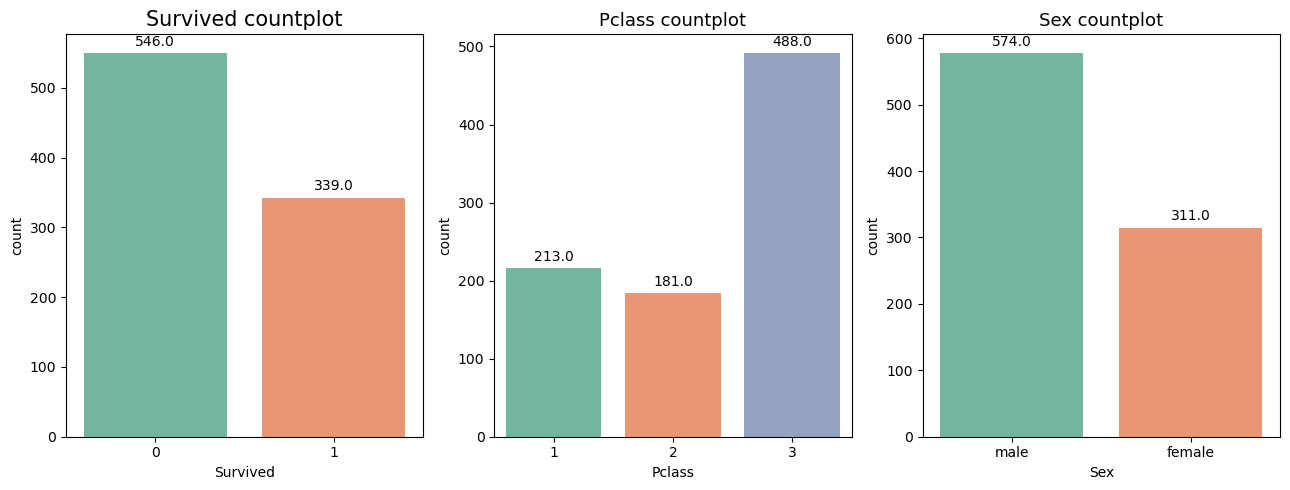

In [14]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Survived countplot', size=15)
plot= sns.countplot(data=train_df, x='Survived' ,palette="Set2")
add_value_labels(plot)

plt.subplot(1,3,2)
plt.title('Pclass countplot', size=13)
plot= sns.countplot(data=train_df, x='Pclass', palette="Set2")
add_value_labels(plot)

plt.subplot(1,3,3)
plt.title('Sex countplot', size=13)
plot= sns.countplot(data=train_df, x='Sex', palette='Set2')
add_value_labels(plot)

plt.tight_layout()

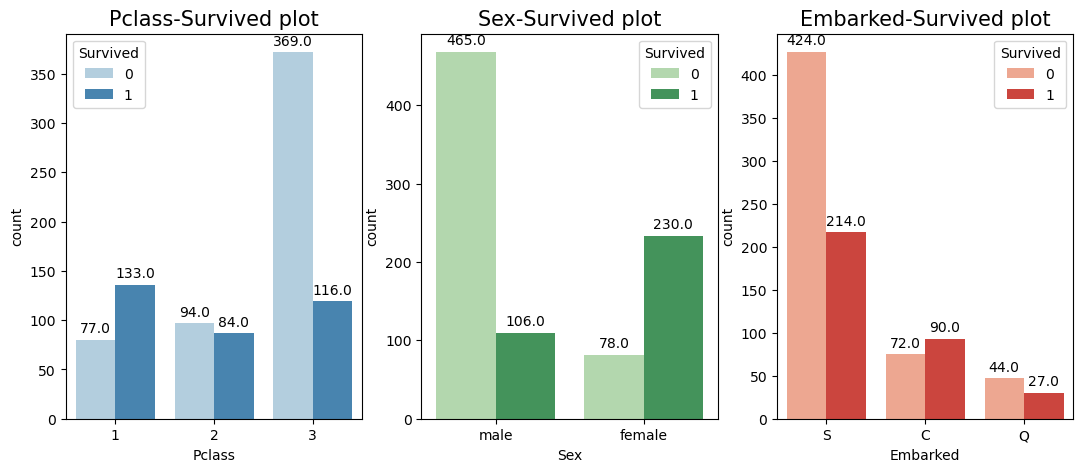

In [15]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Pclass-Survived plot', size=15)
plot= sns.countplot(data=train_df, x='Pclass',hue='Survived' ,palette="Blues")
add_value_labels(plot)

plt.subplot(1,3,2)
plt.title('Sex-Survived plot', size=15)
plot= sns.countplot(data=train_df, x='Sex', hue='Survived' ,palette="Greens")
add_value_labels(plot)

plt.subplot(1,3,3)
plt.title('Embarked-Survived plot', size=15)
plot= sns.countplot(data=train_df, x='Embarked',hue='Survived' ,palette="Reds")
add_value_labels(plot)

In [16]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


## <b>I <span style='color:#595959'>|</span> Analysis Age column </b> 

In [18]:
#survived passengers
survived_df= train_df[train_df['Survived']==1]

#non-survived passengers
unsurvived_df= train_df[train_df['Survived']==0]

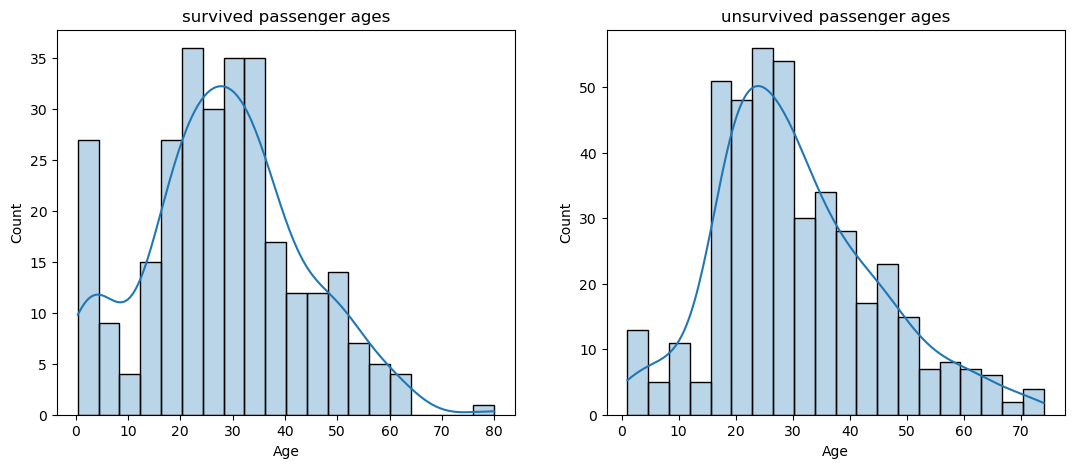

In [19]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
sns.histplot(data=survived_df, x='Age', kde=True, bins=20,  alpha=0.3 );

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
sns.histplot(data=unsurvived_df, x='Age', kde=True, bins=20, alpha=0.3 );


In [20]:
Infant_passengers = train_df[train_df['Age']<=5]
Infant_passengers['Survived'].value_counts(normalize=True)

1    0.704545
0    0.295455
Name: Survived, dtype: float64

In [21]:
Old_passengers = train_df[train_df['Age']==80]
Old_passengers['Survived'].value_counts()

1    1
Name: Survived, dtype: int64

## <b><span style='color:#595959'>|</span> Observations </b> 

* Pclass=3 had most passengers(484 passengers), however the most of them didn't survive (112 passengers not-survived about `75.8%`).

* Most passengers in Pclass=1 survived about `62.9%`. 
<br>

* Infant passengers (Age <=5) had high survival rate, about `70.4%` of infant passengers survived.

* There is only one passengers with 80 years old and he survived.

* Large number of 15-25 year olds did not survive.

* There is only one passengers with 80 years old and he is survived
<br>

* Female passengers had much better survival rate than males( `74.2%` of female passengers survived but just `18.8%` of males survived.)
<br>

* Port S had most passengers(630 passengers) but the most of them didn't survive (420 passengers not-survived about `67%`).

* The majority of port C passengers survived (86 passengers survived out of 154 about `55.8%`).

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 2-  Bivariative Analysis</mark>**

<br>

## <b>I <span style='color:#595959'>|</span> Sex and Age analysis </b> 

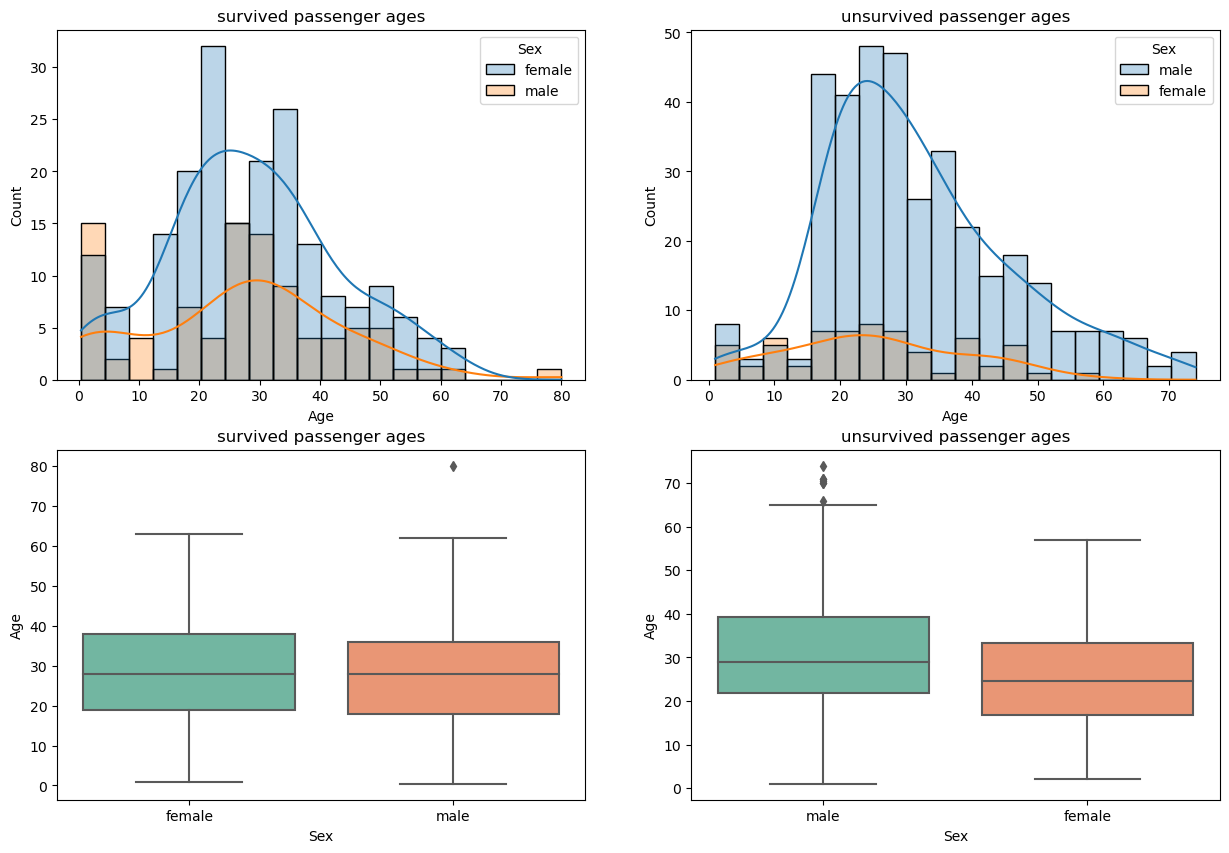

In [22]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('survived passenger ages')
sns.histplot(data=survived_df, x='Age', hue='Sex', kde=True, bins=20,  alpha=0.3 );

plt.subplot(2,2,2)
plt.title('unsurvived passenger ages')
sns.histplot(data=unsurvived_df, x='Age',hue='Sex', kde=True, bins=20, alpha=0.3 );

plt.subplot(2,2,3)
plt.title('survived passenger ages')
sns.boxplot(x=survived_df['Sex'], y=train_df["Age"],palette="Set2");

plt.subplot(2,2,4)
plt.title('unsurvived passenger ages')
sns.boxplot(x=unsurvived_df['Sex'], y=train_df["Age"],palette="Set2");

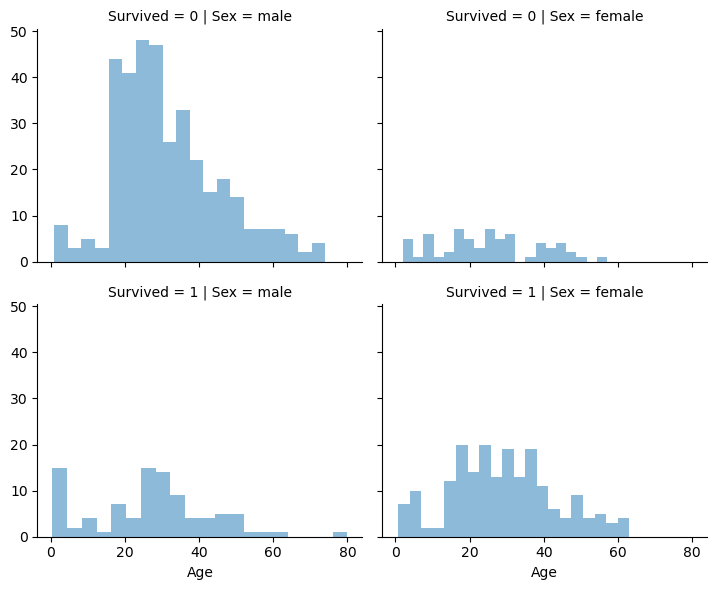

In [23]:
grid = sns.FacetGrid(train_df, col='Sex', row='Survived', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [24]:
print('surviving male passengers \n')

print(survived_df[survived_df['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('surviving female passengers \n')

print(survived_df[survived_df['Sex']=='female'][['Age']].describe().T)

surviving male passengers 

     count       mean        std   min   25%   50%   75%   max
Age   93.0  27.276022  16.504803  0.42  18.0  28.0  36.0  80.0
--------------------------------
surviving female passengers 

     count       mean        std   min   25%   50%   75%   max
Age  197.0  28.847716  14.175073  0.75  19.0  28.0  38.0  63.0


In [25]:
print('non-surviving male passengers \n')

print(unsurvived_df[unsurvived_df['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('non-surviving female passengers \n')

print(unsurvived_df[unsurvived_df['Sex']=='female'][['Age']].describe().T)

non-surviving male passengers 

     count       mean        std  min    25%   50%    75%   max
Age  360.0  31.618056  14.056019  1.0  21.75  29.0  39.25  74.0
--------------------------------
non-surviving female passengers 

     count       mean        std  min    25%   50%    75%   max
Age   64.0  25.046875  13.618591  2.0  16.75  24.5  33.25  57.0


## <b>II <span style='color:#595959'>|</span> Pclass and Age analysis </b> 

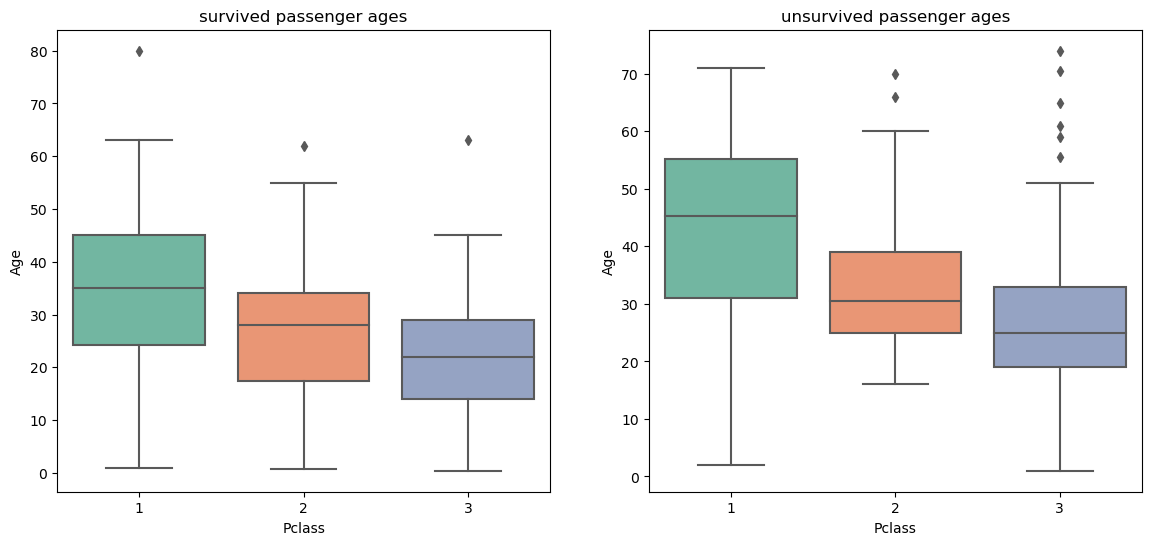

In [26]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
sns.boxplot(x=survived_df['Pclass'], y=train_df["Age"],palette="Set2");

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
sns.boxplot(x=unsurvived_df['Pclass'], y=train_df["Age"],palette="Set2");


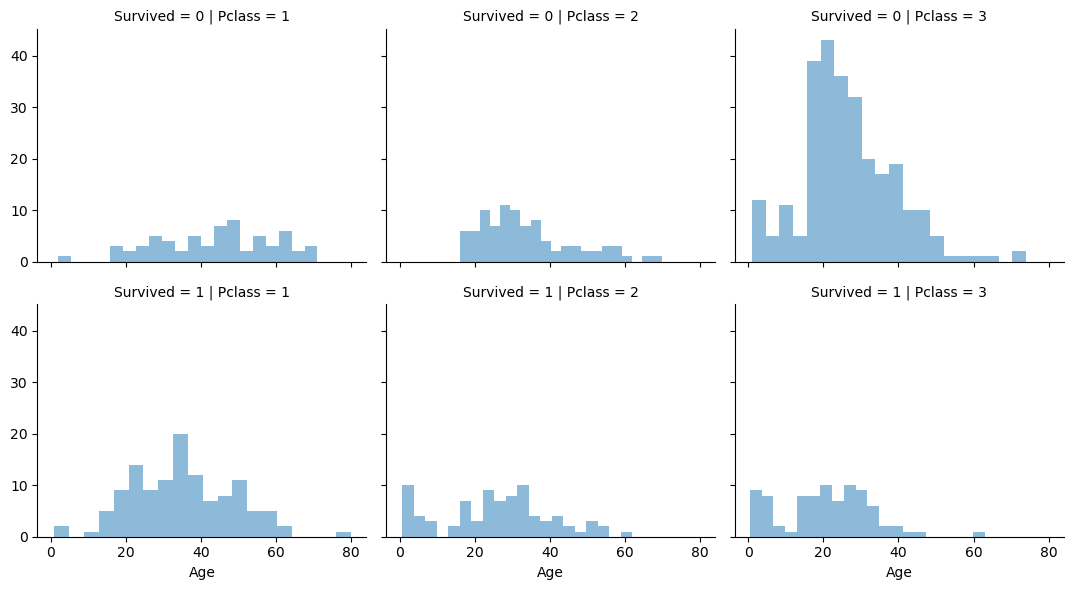

In [27]:
grid = sns.FacetGrid(train_df, col='Pclass', row='Survived', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## <b>III <span style='color:#595959'>|</span> Sex and Pclass analysis </b> 

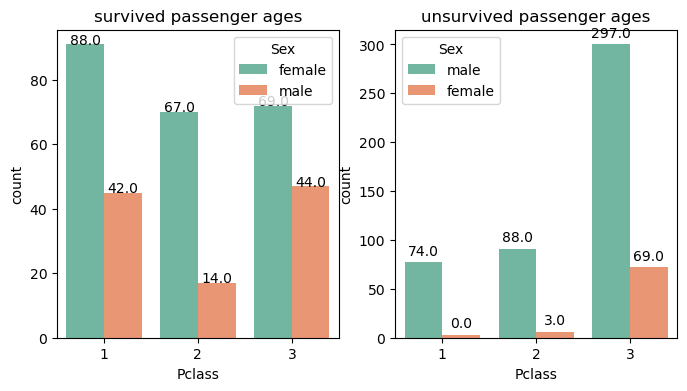

In [28]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_df, x='Pclass', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_df, x='Pclass', hue='Sex',palette="Set2");
add_value_labels(plot)

/Users/pedda/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


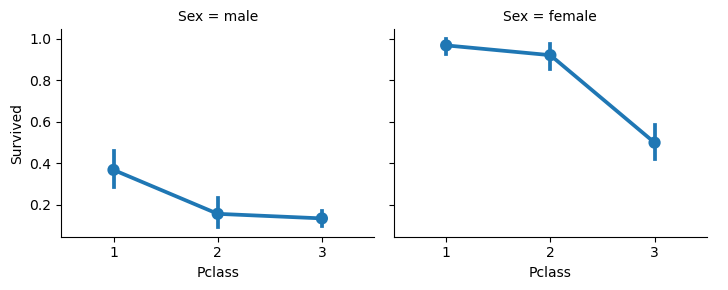

In [29]:
grid = sns.FacetGrid(train_df, col='Sex', aspect=1.2)
grid.map(sns.pointplot,'Pclass', 'Survived')
grid.add_legend();

## <b><span style='color:#595959'>|</span> Observations </b> 

* Average age for non-surviving male passengers is 32, And on the other hand non-surviving female passengers is 25 .

* Most male passengers aged 20-35 did not survive.
<br>


* Infant passengers in Pclass=2 and Pclass=3 mostly survived. 
<br>


* Half of the female passengers inside Pclass=3 survive (`50%` of passengers counted 69).
* All female passengers inside Pclass=1 survived and about `95` of female passengers inside Pclass=2 survived.
* About `87%` of male passengers inside Pclass=3 and Pclass=2 non-survived but about `36.2%` of them survived in Pclass=1.

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 3- Multivariative Analysis</mark>**

<br>

## <b>I <span style='color:#595959'>|</span> Sex, Pclass and Embarked analysis </b> 

/Users/pedda/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/pedda/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


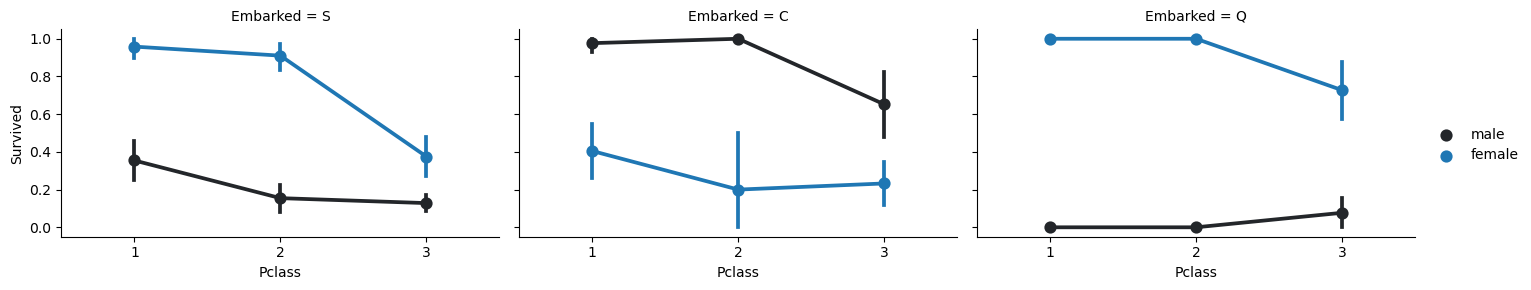

In [30]:
grid = sns.FacetGrid(train_df, col='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend();

## <b>II <span style='color:#595959'>|</span> Sex, Fare and Embarked analysis </b> 

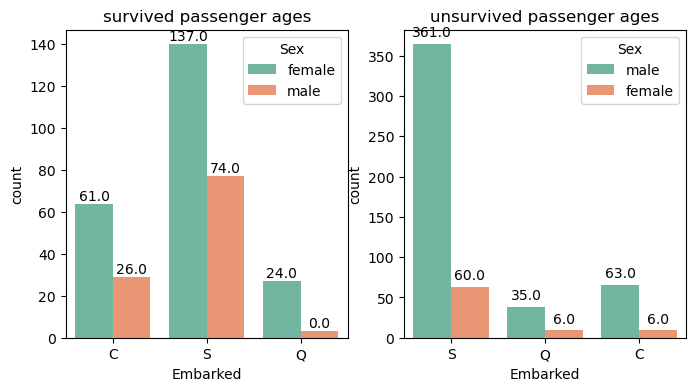

In [31]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_df, x='Embarked', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_df, x='Embarked', hue='Sex',palette="Set2");
add_value_labels(plot)

/Users/pedda/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/pedda/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/pedda/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/pedda/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/pedda/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*p

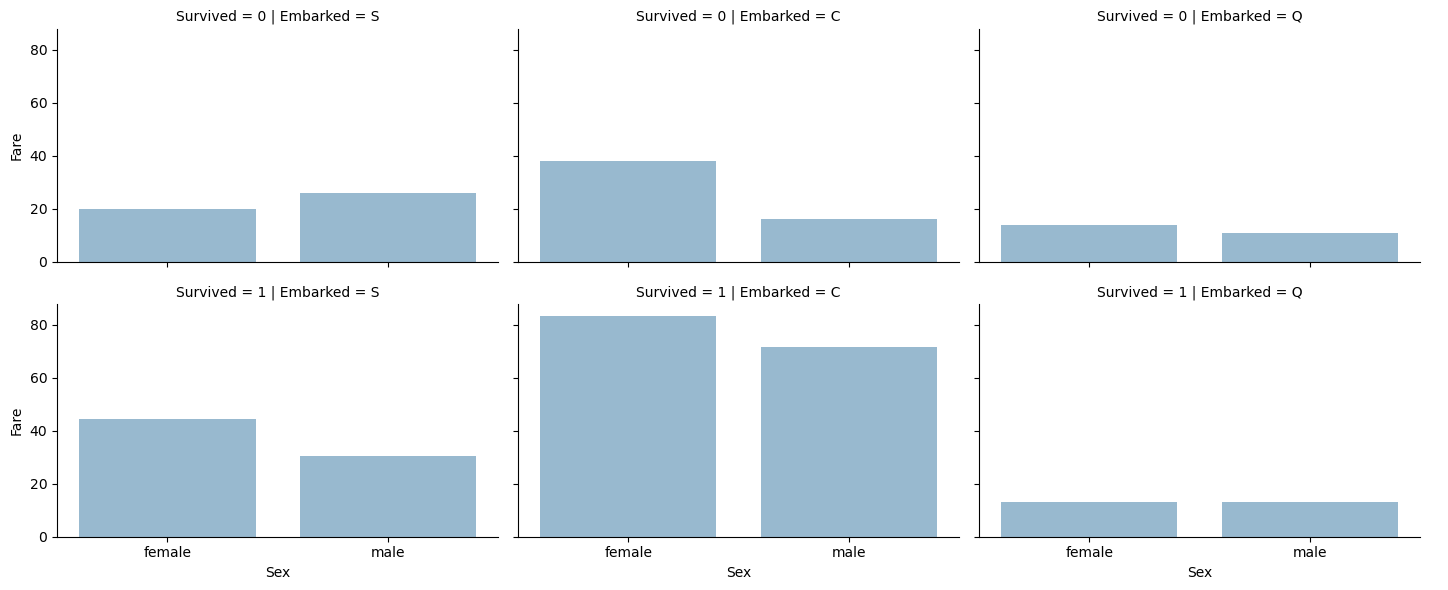

In [32]:
grid = sns.FacetGrid(train_df, col='Embarked', row='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();

## <b><span style='color:#595959'>|</span> Observations </b> 

* Women on port Q and S have a higher chance of survival. But it's inverse at port C.

* Men have a high survival probability on port C, but a low probability on port Q or S.

* Most female passengers inside Pclass=3 on port C and S non-survived but most of them survived on port Q.
<br>
 
 
* Higher fare paying passengers had better survival. 

* Passengers on port Q paid less fare.

* Nearly no male survived on port Q. 

* Femals on port Q (about `37%` of all port Q passengers) Survived, however they paid small fare.



# <a id="4"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>3 | data preprocessing </span></b> </div>

<br>

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 1-  Drop unuseful columns </mark>**
<br>

* Drop `PassengerId` column from the train set, because it won't benefit our model. I won't drop it from the test set, since it's required there for the submission.

* Drop `Cabin` column, becouse 77% of its data are missing. And a general rule is that, if more than half of the data in a column is missing, it's better to drop it.

* Drop `Ticket` column, becouse there may not be a correlation between Ticket and survival and its high ratio of duplicates.

In [33]:
#Drop PassengerId column from the train set
train_df.drop(columns='PassengerId', inplace=True)

#Drop Cabin column.
train_df.drop(columns='Cabin', inplace=True)
test_df.drop(columns='Cabin', inplace=True)

#Drop Ticket column
train_df.drop(columns='Ticket', inplace=True)
test_df.drop(columns='Ticket', inplace=True)

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 2- Dealing with missing values </mark>**
<br>

* We will guess `Age` missing values using random numbers between mean and standard deviation.
<br>

* we will fill missing values of `Embarked` columns with mode value. As a reminder, we have to deal with just two missing values.

In [34]:
datasets=[train_df, test_df]

for dataset in datasets:
    
    #Age column
    
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    nulls = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    random_age = np.random.randint(mean - std, mean + std, size = nulls)
    
    # fill NaN values in Age column with random values generated
    dataset["Age"][dataset["Age"].isna()] = random_age
    dataset["Age"] = train_df["Age"].astype(int)
    
    
    
    #Embarked column
    
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)

/var/folders/ms/g5dss8lj7h9dp49v7kvt1hl00000gq/T/ipykernel_3049/3055197449.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Age"][dataset["Age"].isna()] = random_age
/var/folders/ms/g5dss8lj7h9dp49v7kvt1hl00000gq/T/ipykernel_3049/3055197449.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Age"][dataset["Age"].isna()] = random_age


In [35]:
#check
print(train_df['Age'].isna().sum())
print(train_df['Embarked'].isna().sum())

0
0


## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 3- Create new columns</mark>**
<br>

## <b>I <span style='color:#595959'>|</span> Create Title column </b> 

In [36]:
title_list = pd.concat([train_df,test_df])['Name'].apply(lambda x: re.findall(r'[, ]\w+[.]',x)[0][:-1]).unique()
title_list

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' Countess', ' Jonkheer', ' Dona'], dtype=object)

In [37]:
# replacing all titles with mr, mrs, miss, master, and boy 
def replace_titles(x):
    title=x['Title'].strip()
    
    if (x['Age']<13): return 'Boy'
    
    if title in ['Don', 'Rev', 'Col','Capt','Sir','Major','Jonkheer']: return 'Mr'
    
    elif title in ['Countess', 'Mme']: return 'Mrs'
    
    elif title in ['Mlle', 'Ms','Lady','Dona']: return 'Miss'
    
    elif title =='Dr':
        
        if x['Sex']=='male': return 'Mr'
        else: return 'Mrs'
        
    else: return title
    
for dataset in datasets:
    
    #create a new columns containing the title for each name
    dataset['Title'] = dataset['Name'].apply(lambda x: re.findall(r'[, ]\w+[.]',x)[0][:-1])
    
    #apply replacing title function to all titles
    dataset['Title'] = dataset.apply(replace_titles, axis=1)

In [38]:
print(f'Train data has : {train_df["Title"].unique()}')
print()
print(train_df["Title"].value_counts())

Train data has : ['Mr' 'Mrs' 'Miss' 'Boy' 'Master']

Mr        536
Miss      154
Mrs       128
Boy        69
Master      4
Name: Title, dtype: int64


## <b>II <span style='color:#595959'>|</span> Create FamilyCount column </b> 

* We can create a `FamilyCount` feature which combines `Parch` (number of parents and children) and `SibSp` (number of siblings and spouses) columns. This will enable us to drop Parch and SibSp from our datasets.


In [39]:
for dataset in datasets:
    
    #create FamilyCount column.
    dataset['FamilyCount'] = dataset['SibSp'] + dataset['Parch']+1

In [40]:
train_df['FamilyCount'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilyCount, dtype: int64

## <b>III <span style='color:#595959'>|</span> Create IsAlone column </b> 


* Create a `IsAlone` feature which contain two values (0 or 1). 0 when family count is 1 means there is one alone person and 1 when family count is more than 1.

In [41]:
for dataset in datasets:
    
    #create IsAlone column.
    dataset.loc[dataset['FamilyCount'] > 1, 'IsAlone'] = 0
    dataset.loc[dataset['FamilyCount'] == 1, 'IsAlone'] = 1   
    dataset['IsAlone'] = dataset['IsAlone'].astype(int)

In [42]:
train_df['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [43]:
train_df.groupby(['IsAlone', 'Survived'])['Survived'].count()

IsAlone  Survived
0        0           175
         1           179
1        0           374
         1           163
Name: Survived, dtype: int64

In [44]:
#survived passengers
survived_df= train_df[train_df['Survived']==1]

#non-survived passengers
unsurvived_df= train_df[train_df['Survived']==0]

/Users/pedda/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


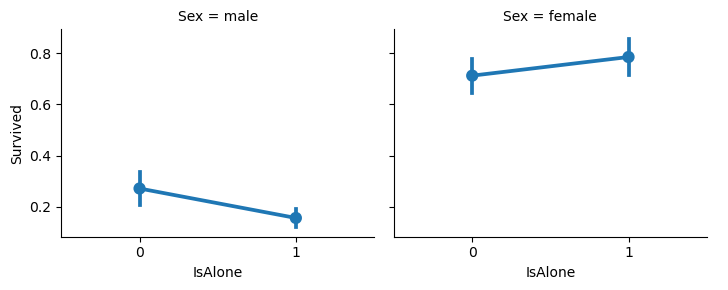

In [45]:
grid = sns.FacetGrid(train_df, col='Sex', aspect=1.2)
grid.map(sns.pointplot,'IsAlone', 'Survived')
grid.add_legend();

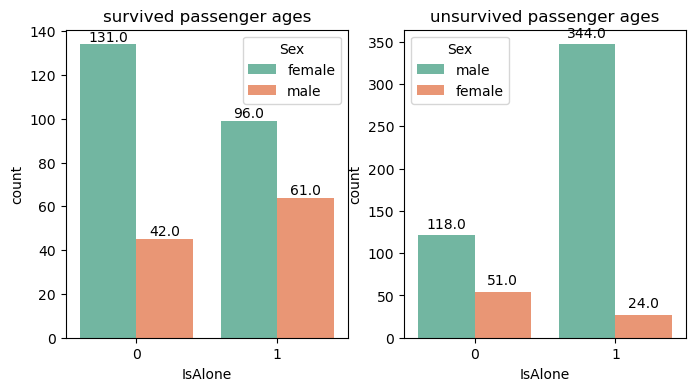

In [46]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_df, x='IsAlone', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_df, x='IsAlone', hue='Sex',palette="Set2");
add_value_labels(plot)

## <b><span style='color:#595959'>|</span> Observations </b> 

* Most of alone men non-survived (About `85%`), on other hand about `72%` of alone women survived. 
* Almost half of the passengers who are not alone survived(About `50.5%`). 


you can check this link for [basic feature engineering with the titanic data.](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) 


In [47]:
#drop columns
for dataset in datasets:
    dataset.drop(columns=['SibSp','Parch','Name'], inplace=True)

In [48]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,IsAlone
0,0,3,male,22,7.2500,S,Mr,2,0
1,1,1,female,38,71.2833,C,Mrs,2,0
2,1,3,female,26,7.9250,S,Miss,1,1
3,1,1,female,35,53.1000,S,Mrs,2,0
4,0,3,male,35,8.0500,S,Mr,1,1


## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 4- Create Categories</mark>**
<br>

## <b>I <span style='color:#595959'>|</span> Age column</b> 
Create Age bands and determine correlations with Survived.
<br>

It is important to place attention on how you form these groups, since you don't want for example that 80% of your data falls into group 1.

In [49]:
train_df['Bands'] = pd.cut(train_df['Age'], 5)
train_df[['Bands', 'Survived']].groupby(['Bands'], as_index=False).mean()

,Bands,Survived
0,"(-0.08, 16.0]",0.526786
1,"(16.0, 32.0]",0.350763
2,"(32.0, 48.0]",0.379167
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [50]:
train_df['Bands'].value_counts()

(16.0, 32.0]     459
(32.0, 48.0]     240
(-0.08, 16.0]    112
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Bands, dtype: int64

In [51]:
for dataset in datasets:    
    
    #create categories
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,IsAlone,Bands
0,0,3,male,1,7.2500,S,Mr,2,0,"(16.0, 32.0]"
1,1,1,female,2,71.2833,C,Mrs,2,0,"(32.0, 48.0]"
2,1,3,female,1,7.9250,S,Miss,1,1,"(16.0, 32.0]"
3,1,1,female,2,53.1000,S,Mrs,2,0,"(32.0, 48.0]"
4,0,3,male,2,8.0500,S,Mr,1,1,"(32.0, 48.0]"


## <b>II <span style='color:#595959'>|</span> Fare column</b> 

Frist we will check for missing values then we can create bands.

In [52]:
print(train_df['Fare'].isna().sum())
print(test_df['Fare'].isna().sum())

0
1


* there is only one missing value in test set. So, let's fill it with median.

In [53]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,IsAlone
0,892,3,male,1,7.8292,Q,Mr,1,1
1,893,3,female,2,7.0000,S,Mrs,2,0
2,894,2,male,1,9.6875,Q,Mr,1,1
3,895,3,male,2,8.6625,S,Mr,1,1
4,896,3,female,2,12.2875,S,Mrs,3,0


In [54]:
train_df['Bands'] = pd.cut(train_df['Fare'], 4)
train_df[['Bands', 'Survived']].groupby(['Bands'], as_index=False).mean()

,Bands,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [55]:
train_df['Bands'].value_counts(normalize=True)

(-0.512, 128.082]     0.957351
(128.082, 256.165]    0.032548
(256.165, 384.247]    0.006734
(384.247, 512.329]    0.003367
Name: Bands, dtype: float64

<div style="border-radius:10px;border:#404040 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
For the 'Fare' feature, we can't do the same as with the 'Age' feature because 95% of the values fall into the first category. Fortunately, we can use "qcut()" function, that we can use to see, how we can form the categories.
</div>


In [56]:
train_df['Bands'] = pd.qcut(train_df['Fare'], 4)
train_df[['Bands', 'Survived']].groupby(['Bands'], as_index=False).mean()

,Bands,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [57]:
train_df['Bands'].value_counts(normalize=True)

(7.91, 14.454]     0.251403
(-0.001, 7.91]     0.250281
(14.454, 31.0]     0.249158
(31.0, 512.329]    0.249158
Name: Bands, dtype: float64

Now it looks good.

In [58]:
for dataset in datasets:
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,IsAlone,Bands
0,0,3,male,1,0,S,Mr,2,0,"(-0.001, 7.91]"
1,1,1,female,2,3,C,Mrs,2,0,"(31.0, 512.329]"
2,1,3,female,1,1,S,Miss,1,1,"(7.91, 14.454]"
3,1,1,female,2,3,S,Mrs,2,0,"(31.0, 512.329]"
4,0,3,male,2,1,S,Mr,1,1,"(7.91, 14.454]"
5,0,3,male,1,1,Q,Mr,1,1,"(7.91, 14.454]"
6,0,1,male,3,3,S,Mr,1,1,"(31.0, 512.329]"
7,0,3,male,0,2,S,Boy,5,0,"(14.454, 31.0]"
8,1,3,female,1,1,S,Mrs,3,0,"(7.91, 14.454]"
9,1,2,female,0,2,C,Mrs,2,0,"(14.454, 31.0]"


In [59]:
#drop Bands column
train_df.drop(columns='Bands',inplace=True)

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 5- Encode categorical features</mark>**
<br>

 We have three categorical features Sex, Embarked and Title. So, we should convert them ti numeric.

In [60]:
for dataset in datasets:
    
    #encode Sex column
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
    
    #encode Embarked column
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
    #encode Title column
    dataset['Title'] = dataset['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Boy": 4}).astype(int)

In [61]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,IsAlone
0,892,3,1,1,0,2,0,1,1
1,893,3,0,2,0,0,2,2,0
2,894,2,1,1,1,2,0,1,1
3,895,3,1,2,1,0,0,1,1
4,896,3,0,2,1,0,2,3,0


In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,IsAlone
0,0,3,1,1,0,0,0,2,0
1,1,1,0,2,3,1,2,2,0
2,1,3,0,1,1,0,1,1,1
3,1,1,0,2,3,0,2,2,0
4,0,3,1,2,1,0,0,1,1


# <a id="5"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>4 | Modeling </span></b> </div>

<br>

We have chosen to employ a variety of models, namely **<span style='color:#404040'>SVM</span>** , **<span style='color:#404040'>RandomForest</span>** , **<span style='color:#404040'>KNeighbors Classifier</span>** , **<span style='color:#404040'>Decision Tree Classifier</span>** , **<span style='color:#404040'>Logistic Regression</span>** and **<span style='color:#404040'>Gradient Boosting Classifier</span>**.


These algorithms are known for their distinct strengths when dealing with diverse data types and structures.

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 1- Model Building</mark>**
<br>

## <b>I <span style='color:#595959'>|</span> Define models</b> 


In [63]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [64]:
Models = [
        
        ("SVM",      SVC()),     #Support Vector Machines
               
        ("kNN",      KNeighborsClassifier(n_neighbors = 3)),    #KNeighborsClassifier

        ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),   #Logistic Regression model

        ("DT_model", DecisionTreeClassifier(random_state=42)),    #Decision tree model

        ("RF_model", RandomForestClassifier(random_state=42, n_jobs=-1)),   #Random Forest model

        ("GradientBoosting",GradientBoostingClassifier(max_depth=2,     #GradientBoosting model
                                                      n_estimators=100))
        ]

## <b>II <span style='color:#595959'>|</span> Train our models</b> 


In [65]:
accuracies = {}
models = {}
model = Models
for name,model in Models:
    model.fit(X_train, y_train)
    models[name] = model
    acc = model.score(X_train, y_train)*100
    accuracies[name] = acc
    print("{} Accuracy Score : {:.3f}%".format(name,acc))

SVM Accuracy Score : 82.716%
kNN Accuracy Score : 83.614%
LR_model Accuracy Score : 81.818%
DT_model Accuracy Score : 88.552%
RF_model Accuracy Score : 88.552%
GradientBoosting Accuracy Score : 83.838%


In [66]:
models_res = pd.DataFrame(data=accuracies.items())
models_res.columns = ['Model','Test score']
models_res.sort_values('Test score',ascending=False)

,Model,Test score
3,DT_model,88.552189
4,RF_model,88.552189
5,GradientBoosting,83.838384
1,kNN,83.613917
0,SVM,82.716049
2,LR_model,81.818182


## <b>III <span style='color:#595959'>|</span> Estimate the performance of our models</b> 


### **<mark style="color:#404040;border-radius:20px;opacity:1.5;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> Cross-Validation  </mark>**
<br>


Cross-validation is used to estimate the performance of a model on unseen data. It helps assess how well the model generalizes to unseen data. The basic idea behind cross-validation is to split the available dataset into multiple subsets or folds.

<br>

<div style="border-radius:10px;border:#595959 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
This approach makes the best use of all the data we are given, so it's particularly useful when the sample size is small.</div>

<br>
The most common type is k-fold cross-validation. In k-fold cross-validation, the data is divided into k equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold.

This process is repeated k times, with each fold serving as the test set once. The performance metric is then averaged across all the folds to get an estimate of the model's performance.

### **<mark style="color:white;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> Note that </mark>**

Calculate the value of mean and standard deviation of averaged across all the folds and the  best model that have a good mean accracy and a low value of standard deviation. 



In [67]:
models_data = {'min_score':{},'max_score':{},'mean_score':{},'std_dev':{}}
for name, model in Models:   
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=5, scoring="accuracy" )
    
    # output:
    
    #min accuracy.
    min_score = round(min(cv_results)*100, 4)
    models_data['min_score'][name] = min_score
     
    #max accuracy.
    max_score = round(max(cv_results)*100, 4)
    models_data['max_score'][name] = max_score
    
    #average accuracy.
    mean_score = round(np.mean(cv_results)*100, 4)
    models_data['mean_score'][name] = mean_score
    
    #standard deviation of the data to see degree of variance in the results.
    std_dev = round(np.std(cv_results), 4)
    models_data['std_dev'][name] = std_dev

In [68]:
models_df = pd.DataFrame(models_data)
models_df

,min_score,max_score,mean_score,std_dev
SVM,80.3371,85.3933,82.7142,0.0188
kNN,72.0670,83.7079,78.9078,0.0404
LR_model,78.6517,84.2697,81.1449,0.0180
DT_model,78.7709,85.3933,81.3722,0.0267
RF_model,77.6536,85.9551,81.0363,0.0284
GradientBoosting,80.3371,85.3933,82.3784,0.0177


## <b>IV <span style='color:#595959'>|</span> Chose the best model</b> 

We found that `decision tree` model with K-Fold Cross Validation reached a good mean accracy and a lowest value of standard deviation. The value of std is extremely low, which means that our model has a very low variance. The model performed good on all test sets. which mean that our model has no overfitting.

## **<mark style="color:#404040;border-radius:20px;opacity:1.5;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> Decision Tree model  </mark>**
<br>

**<span style='color:#8e9b9a'>Decision tree</span>** builds tree branches and each branch can be considered as an if-else statement. The branches develop by partitioning the dataset into subsets based on most important features. Final classification happens at the leaves of the decision tree.

▶ **<span style='color:#8e9b9a'>decision tree common hyperparameters: </span>** max_depth, min_samples_split, min_samples_leaf; max_features.

<p style="text-align:center; ">
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*fSlQBEta5GKjNgZGsVTVTA.png" style='width: 500px; height: 300px;'>
</p>


### **<span style='color:#8e9b9a'> Advantages of Decision Tree</span>**
* Extremely fast at classifying unknown records.
* Easy to interpret for small-sized trees.
* Their accuracy is comparable to other classification techniques for many simple data sets.
* Exclude unimportant features.

### **<span style='color:#8e9b9a'> Disadvantages of Decision Tree</span>**
* Easy to overfit.
* Decision tree models are often biased toward splits on features having a large number of levels.
* Small changes in the training data can result in large changes to decision logic.
* Large trees can be difficult to interpret and the decisions they make may seem counter-intuitive.

[Check it out for more about Decision Tree](https://builtin.com/data-science/classification-tree).

In [69]:
# Decision Tree
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

acc_decision_tree = round(DT_model.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

88.55 %


## <b>V <span style='color:#595959'>|</span> Hyperparameter Tuning </b> 

how to optimize your model built using the previous section using the GridSearchCV.

## **<mark style="color:#404040;border-radius:20px;opacity:1.5;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> Grid search  </mark>**
<br>
Grid search is used for hyperparameter tuning, where a predefined set of hyperparameters is explored to find the combination that yields the best performance. It is often used in conjunction with cross-validation to evaluate the performance.

let's tune our model. The first step is creating a range of hyperparameters that we want to evaluate. And Create a `GridSearchCV` model that includes your classifier and hyperparameter grid.



[Click here for more](https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27)


In [70]:
#our hyperparameter grid
params = {
    "max_depth":range(10,50,10) ,
    "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
    "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
    "max_features": ['auto', 'sqrt']
}
model = GridSearchCV(
    DT_model,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35]},
             verbose=1)

In [71]:
# Extract best hyperparameters
print(model.best_params_)
print("-------------")
print(model.best_score_)
print("-------------")
print(model.best_estimator_)

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
-------------
0.829408072311845
-------------
DecisionTreeClassifier(max_depth=30, max_features='sqrt', min_samples_split=10)


In [72]:
# Random Forest
DT_model = model.best_estimator_

DT_model.fit(X_train, y_train)

acc_decision_tree = round(DT_model.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2), "%")

86.42 %


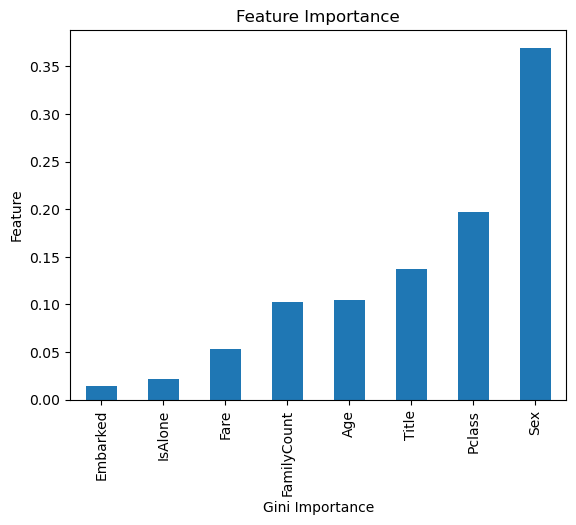

In [73]:
# Get feature names from training data
features = X_train.columns

# Extract importances from model
importances = model.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()

# Plot 10 most important features
feat_imp.plot(kind='bar')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

# <a id="6"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>5 | Evaluate </span></b> </div>

<br>

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 1- Confusion Matrix</mark>**
<br>

**<span style='color:#595959'>Confusion matrix</span>** is a table that summarize the performance of classification models by compared the actual values with predicted values.

**It shows:**

**<span style='color:#595959'>True Posetive(TP):</span>** correctly prediction as a positive (belong to positive class and predicted as positive)

**<span style='color:#595959'>False Positive(FP):</span>** incorrectly prediction as a positive (belong to negative class but predicted as positive)

**<span style='color:#595959'>False Negative(FN):</span>** incorrectly prediction as a negative (belong to positive class but predicted as negative)

**<span style='color:#595959'>True Negative(TN):</span>** correctly prediction as a negative (belong to negative class and predicted as negative)

<br>

<div style="border-radius:10px;border:#595959 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
note: A good model is one which has high True Posetive(TP) and True Negative(TN) rates
</div>

<p style="text-align:center; ">
<img src="https://www.researchgate.net/profile/Francois_Waldner/publication/340876219/figure/download/fig4/AS:883619027501056@1587682601588/Illustrative-error-matrix-Shaded-areas-represent-data-that-are-not-available-for.ppm" style='width: 400px; height: 300px;'>
</p>


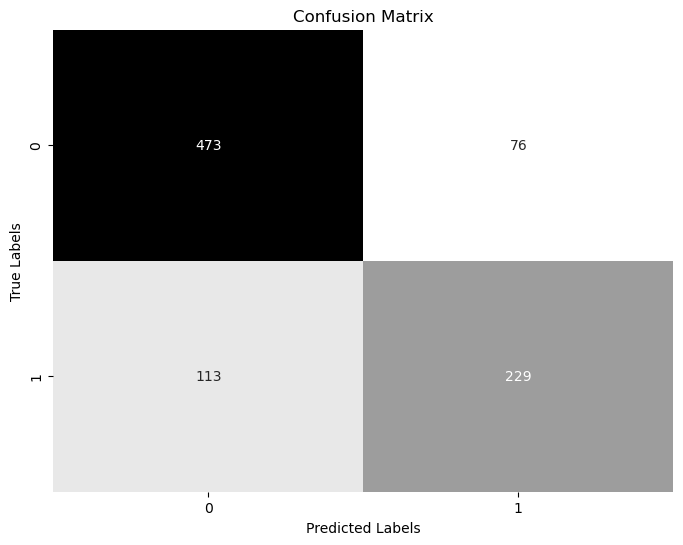

In [74]:
# Create a confusion matrix
predictions = cross_val_predict(DT_model, X_train, y_train, cv=3)

cm = confusion_matrix(y_train, predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="gray_r", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

A confusion matrix gives you a lot of information about how well your model does, but theres a other ways to get even more.

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 2- Precision,Recall and F1-Score</mark>**
<br>

**<span style='color:#595959'>Precision</span>**

Precision is a measure of how many of the true positive predictions were actually correct. 

<p class="formulaDsp">
\[ Precision = \frac{TP}{TP + FP} \]
</p>

**<span style='color:#595959'>Recall</span>**

Recall (or Sensitivity) is a measure of how many of the actual positive cases were identified correctly.

<p class="formulaDsp">
\[ Recall = \frac{TP}{TP + FN} \]
</p>

**<span style='color:#595959'>F1-Score</span>**

The F1 score is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall. 

* F1-Score is important when the poth precision and recall are equally important and it helps to find a trade-off between recall and precision.

<p class="formulaDsp">
\[ F1 Score = \frac{2 * Precision * Recall}{Precision + Recall} \]
</p>


In [75]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_train,predictions, average='weighted')
recall = recall_score(y_train,predictions, average='weighted')
f1 = f1_score(y_train,predictions, average='weighted')

# Print evaluation metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

Precision: 0.7855
Recall: 0.7879
F1-score: 0.7853


* Our model predicts `80%` of the passengers survival correctly (precision). The recall tells us that it predicted the survival of `80%` of the people who actually survived.

* F1-score favors classifiers that have a similar precision and recall. So, we have about `80%` F-score. The score is fairly good.

## **<mark style="color:#404040;border-radius:5px;opacity:1.0;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"> 3- Auc - Roc curve and score</mark>**
<br>

It tells how much model is capable of distinguishing between classes.
Higher the AUC, better the model is at distinguishing between survived and not.

▶ **<span style='color:#595959'>ROC curve:</span>** is a graph showing the performance of a classification model at all classification thresholds.

<br>

<div style="border-radius:10px;border:#595959 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
This curve plots two parameters:
    True Positive Rate(TPR), False Positive Rate(FPR)
</div>

<br>

▶ **<span style='color:#595959'>AUC</span>**

AUC stands for `Area under the ROC Curve` That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

<br>

▶ **<span style='color:#595959'> ROC AUC Score:</span>**  is the corresponding score to the ROC AUC Curve. It simply measure the area under the curve, which is called AUC.

In [76]:
#probabilities of our predictions
y_scores = DT_model.predict_proba(X_train) 

Roc_Auc_Score = roc_auc_score(y_train, y_scores[:,1])
print("ROC-AUC-Score:", Roc_Auc_Score)

ROC-AUC-Score: 0.9303252058500836


the score is good enough.

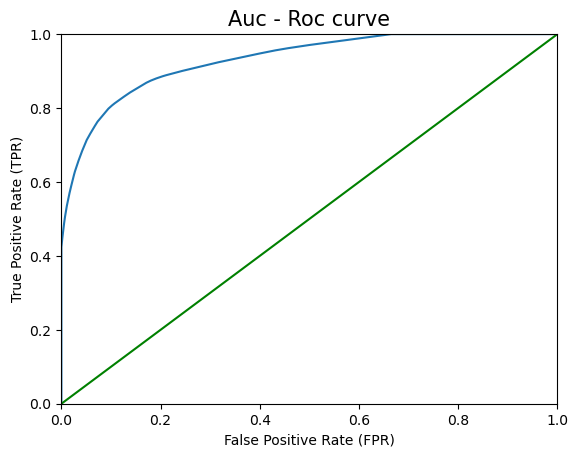

In [77]:
FPR, TPR, thresholds = roc_curve(y_train, y_scores[:,1])

plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], 'g')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Auc - Roc curve',fontsize=15);

* Our model should be as far away from green line(purely classifier) as possible. Our model seems to be very good.

Now, I think our model is good enough to submit the predictions for the test-set.

# <a id="7"></a>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.3be5e39321febd4c1f758691e109c8bd?rik=lkhAzU4ulIuL0Q&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f5%2f56%2fRMS_Titanic_2.jpg&ehk=VbIvq0%2b63pXvH%2bl3Ln4tlz%2bwppwyoN%2fUTZDuGVYTHiQ%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:#404040'>6 | Submission </span></b> </div>

<br>


In [79]:
#predictions for the test-set.
Y_prediction = DT_model.predict(X_test)

#submission
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False)